In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

plt.rcParams['figure.figsize'] = (11, 8)

In [3]:
data = pd.read_csv('https://github.com/genzj/data-visualization-course/raw/master/data/bike-sharing-demand/train.csv', parse_dates=[0])
print(data.dtypes)
data.head()

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
temp_cut = pd.cut(data.temp, range(0, 50, 5))
hum_cut = pd.cut(data.humidity, range(0, 100, 10))
subframe = data.groupby([temp_cut, hum_cut])['count'].sum().unstack()
subframe.head()

humidity,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]"
temp,,,,,,,,,
"(0, 5]",NaN,NaN,156.0,551.0,2880.0,2375.0,211.0,680.0,NaN
"(5, 10]",NaN,NaN,2640.0,14052.0,14082.0,19217.0,13498.0,8232.0,8675.0
"(10, 15]",NaN,374.0,10436.0,29699.0,75357.0,58634.0,45104.0,19046.0,29184.0
"(15, 20]",NaN,3317.0,13025.0,58123.0,55053.0,38287.0,45012.0,46563.0,53144.0
"(20, 25]",184.0,5282.0,34663.0,54925.0,71653.0,75840.0,62536.0,64210.0,54218.0


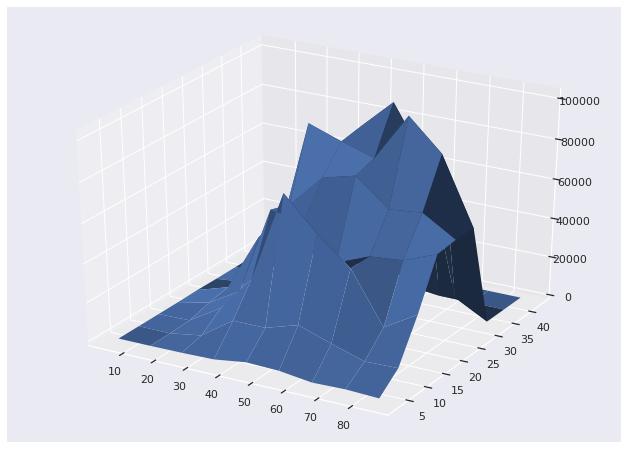

In [5]:
ax = plt.figure().add_subplot(projection='3d')
x = subframe.columns.map(lambda x: x.mid).to_numpy()
y = subframe.index.map(lambda x: x.mid).to_numpy()

x, y = np.meshgrid(x, y)
z = subframe.fillna(0).to_numpy()

ax.plot_surface(x, y, z, linewidth=0)
plt.show()

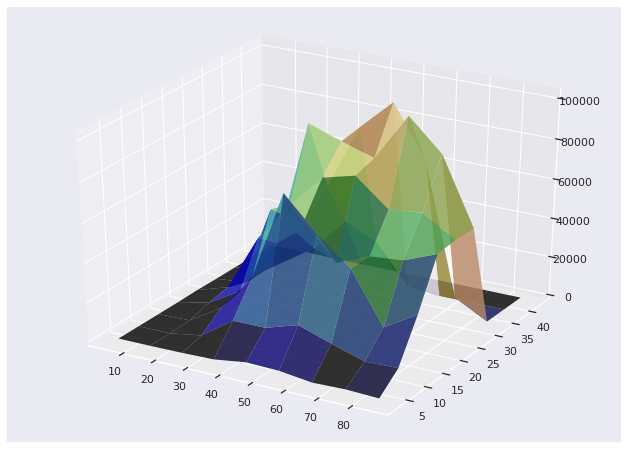

In [6]:
from matplotlib import cm
from matplotlib.colors import LightSource


ax = plt.figure().add_subplot(projection='3d')
x = subframe.columns.map(lambda x: x.mid).to_numpy()
y = subframe.index.map(lambda x: x.mid).to_numpy()
x, y = np.meshgrid(x, y)
z = subframe.fillna(0).to_numpy()


ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')

ax.plot_surface(x, y, z, linewidth=0, facecolors=rgb, shade=False, alpha=0.8)
plt.show()

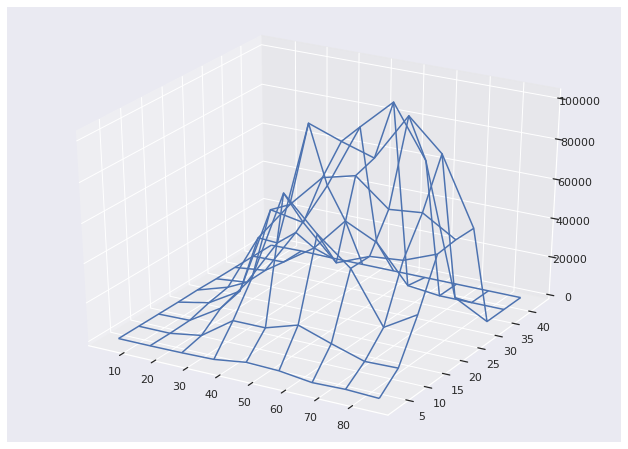

In [7]:
ax = plt.figure().add_subplot(projection='3d')
x = subframe.columns.map(lambda x: x.mid).to_numpy()
y = subframe.index.map(lambda x: x.mid).to_numpy()

x, y = np.meshgrid(x, y)
z = subframe.fillna(0).to_numpy()

ax.plot_wireframe(x, y, z)
plt.show()

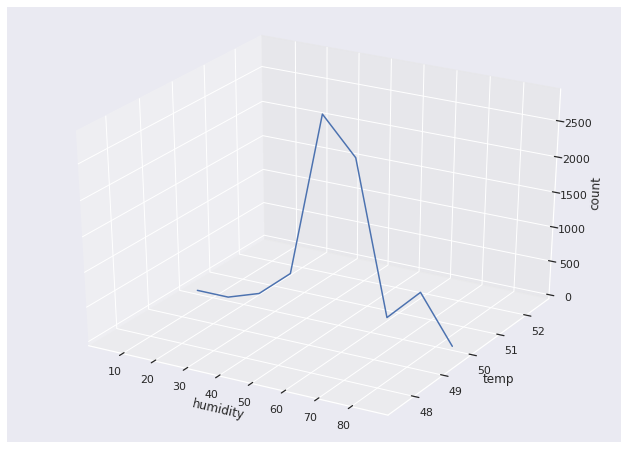

In [8]:
ax = plt.figure().add_subplot(projection='3d')
x = subframe.columns.map(lambda x: x.mid).to_numpy()
y = subframe.index.map(lambda x: x.mid).to_numpy()

z = subframe.fillna(0).to_numpy()

ax.plot(x, z[0], zs=50, zdir='y')
ax.xaxis.set_label_text('humidity')
ax.yaxis.set_label_text('temp')
ax.zaxis.set_label_text('count')
plt.show()

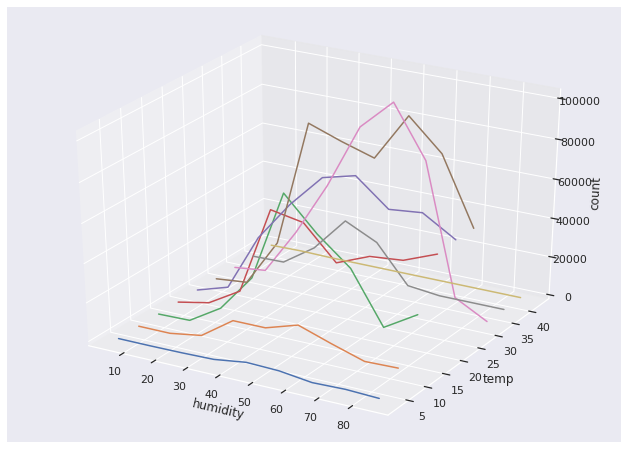

In [9]:
ax = plt.figure().add_subplot(projection='3d')
x = subframe.columns.map(lambda x: x.mid).to_numpy()
y = subframe.index.map(lambda x: x.mid).to_numpy()

z = subframe.fillna(0).to_numpy()

for idx in range(len(y)):
  ax.plot(x, z[idx], zs=y[idx], zdir='y')
ax.xaxis.set_label_text('humidity')
ax.yaxis.set_label_text('temp')
ax.zaxis.set_label_text('count')

# ax.view_init(elev=0., azim=90)
plt.show()

